In [2]:
import numpy as np
import pandas as pd

In [3]:
label_df = pd.read_csv('C:/Users/CPB06GameN/Desktop/빅콘/2019_빅콘테스트_챔피언스리그_데이터/train_label.csv')

In [4]:
label_df.tail()

,acc_id,survival_time,amount_spent
39995,13809,64,0.302485
39996,83195,64,0.005119
39997,17325,64,0.047182
39998,99716,39,0.000000
39999,27258,64,0.006661


##### 임의의 데이터 5개를 군집화 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [6]:
activity_df = pd.read_csv('C:/Users/CPB06GameN/Desktop/빅콘/2019_빅콘테스트_챔피언스리그_데이터/train_activity.csv')

In [7]:
activity_df.tail()

,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
1594668,28,49021,109142,bs,1.163729,0.0,0.0,0.0,0.0,0,0.24537,0.246819,0.0,0.0,0.0,0.000246,0.0
1594669,28,54844,117439,bs,1.147138,0.0,0.0,0.0,0.0,0,0.24537,0.246819,0.0,0.0,0.0,-0.000307,0.0
1594670,28,60388,78905,bs,1.151879,0.0,0.0,0.0,0.0,0,0.24537,0.246819,0.0,0.0,0.0,-0.003663,0.0
1594671,28,72319,196592,bs,1.156619,0.0,0.0,0.0,0.0,0,0.49074,0.493639,0.0,0.0,0.0,-0.001999,0.0
1594672,28,73739,383802,bs,1.140028,0.0,0.0,0.0,0.0,0,0.49074,0.493639,0.0,0.0,0.0,0.001129,0.0


##### 필요없는 컬럼 삭제

In [8]:
activity_df2=activity_df.drop(columns=['boss_monster','exp_recovery','server','day','char_id','solo_exp','party_exp','quest_exp','death','revive','enchant_count'])

In [9]:
activity_df2.tail()

,acc_id,playtime,npc_kill,fishing,private_shop,game_money_change
1594668,49021,1.163729,0.0,0.0,0.0,0.000246
1594669,54844,1.147138,0.0,0.0,0.0,-0.000307
1594670,60388,1.151879,0.0,0.0,0.0,-0.003663
1594671,72319,1.156619,0.0,0.0,0.0,-0.001999
1594672,73739,1.140028,0.0,0.0,0.0,0.001129


##### label 파일과 merge

In [10]:
act_lab_df=pd.merge(label_df,activity_df2,how='inner',on='acc_id')

In [11]:
act_lab_df.tail()

,acc_id,survival_time,amount_spent,playtime,npc_kill,fishing,private_shop,game_money_change
1594668,27258,64,0.006661,0.151688,0.242910,0.0,0.0,-0.001794
1594669,27258,64,0.006661,0.149318,0.187243,0.0,0.0,0.000964
1594670,27258,64,0.006661,0.007110,0.000000,0.0,0.0,-0.000142
1594671,27258,64,0.006661,0.158798,0.169362,0.0,0.0,0.002365
1594672,27258,64,0.006661,0.149318,0.202088,0.0,0.0,0.006644


In [12]:
data_points = act_lab_df.values

In [13]:
kmeans = KMeans(n_clusters=3).fit(data_points)

In [14]:
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [15]:
act_lab_df['cluster_id'] = kmeans.labels_

In [16]:
act_lab_df.tail()

,acc_id,survival_time,amount_spent,playtime,npc_kill,fishing,private_shop,game_money_change,cluster_id
1594668,27258,64,0.006661,0.151688,0.242910,0.0,0.0,-0.001794,2
1594669,27258,64,0.006661,0.149318,0.187243,0.0,0.0,0.000964,2
1594670,27258,64,0.006661,0.007110,0.000000,0.0,0.0,-0.000142,2
1594671,27258,64,0.006661,0.158798,0.169362,0.0,0.0,0.002365,2
1594672,27258,64,0.006661,0.149318,0.202088,0.0,0.0,0.006644,2


In [21]:
act_lab_df2=act_lab_df[:100000]

In [22]:
act_lab_df3=act_lab_df2[act_lab_df2['survival_time']<64]

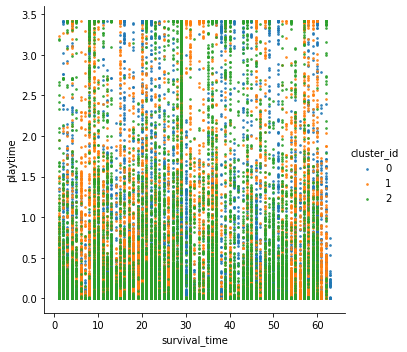

In [25]:
sns.lmplot('survival_time','playtime',data=act_lab_df3,fit_reg=False,scatter_kws={'s':3},
          hue='cluster_id')